## Introduction

The dataset is stored in the fandango_score_comparison.csv file. It contains information on how major movie review services rated movies. The data originally came from FiveThirtyEight

In [2]:
import pandas as pd

movies = pd.read_csv("fandango_score_comparison.csv")

In [3]:
movies

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.30,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.00,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.50,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.40,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5
5,The Water Diviner (2015),63,62,50,6.8,7.2,4.5,4.0,3.15,3.10,...,3.60,3.0,3.0,2.5,3.5,3.5,34,39373,397,0.5
6,Irrational Man (2015),42,53,53,7.6,6.9,4.0,3.5,2.10,2.65,...,3.45,2.0,2.5,2.5,4.0,3.5,17,2680,252,0.5
7,Top Five (2014),86,64,81,6.8,6.5,4.0,3.5,4.30,3.20,...,3.25,4.5,3.0,4.0,3.5,3.5,124,16876,3223,0.5
8,Shaun the Sheep Movie (2015),99,82,81,8.8,7.4,4.5,4.0,4.95,4.10,...,3.70,5.0,4.0,4.0,4.5,3.5,62,12227,896,0.5
9,Love & Mercy (2015),89,87,80,8.5,7.8,4.5,4.0,4.45,4.35,...,3.90,4.5,4.5,4.0,4.5,4.0,54,5367,864,0.5


Each row represents a single movie. Each column contains information about how the online moview review services RottenTomatoes, Metacritic, IMDB, and Fandango rated the movie. The dataset was put together to help detect bias in the movie review sites. Each of these sites has 2 types of score -- User scores, which aggregate user reviews, and Critic score, which aggregate professional critical reviews of the movie. Each service puts their ratings on a different scale:

- **RottenTomatoes** - 0-100, in increments of 1.
- **Metacritic** - 0-100, in increments of 1.
- **IMDB** - 0-10, in increments of .1.
- **Fandango** - 0-5, in increments of .5.

Typically, the primary score shown by the sites will be the Critic score. Here are descriptions of some of the relevant columns in the dataset:

- **FILM** -- the name of the movie.
- **RottenTomatoes** -- the RottenTomatoes (RT) critic score.
- **RottenTomatoes_User** -- the RT user score.
- **Metacritic** -- the Metacritic critic score.
- **Metacritic_User** -- the Metacritic user score.
- **IMDB** -- the IMDB score given to the movie.
- **Fandango_Stars** -- the number of stars Fandango gave the movie.

To make it easier to compare scores across services, the columns were normalized so their scale and rounding matched the Fandango ratings. Any column with the suffix _norm is the corresponding column changed to a 0-5 scale. For example, RT_norm takes the RottenTomatoes column and turns it into a 0-5 scale from a 0-100 scale. Any column with the suffix _round is the rounded version of another column. For example, RT_user_norm_round rounds the RT_user_norm column to the nearest .5.

### Statistical exploration

We can do some statistical exploration of the ratings columns. We'll primarily focus on the Metacritic_norm_round and the Fandango_Stars columns, which will let you see how Fandango and Metacritic differ in terms of review scores.


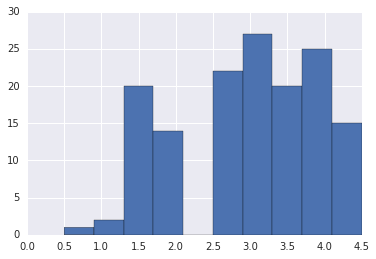

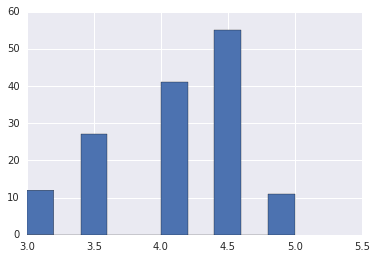

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.hist(movies['Metacritic_norm_round'])
plt.show()
plt.hist(movies['Fandango_Stars'])
plt.show()

**Findings:** Clearly the Fandango scores are higher thean the Metacritic

### Quantifying the differences

Now, We will apply statistics metrics to quantify these differences

In [12]:
import numpy as np

Fandango_mean = movies['Fandango_Stars'].mean()
Metacritic_mean = movies['Metacritic_norm_round'].mean()

Fandango_median = np.median(movies['Fandango_Stars'])
Metacritic_median = np.median(movies['Metacritic_norm_round'])

Fandango_std = np.std(movies['Fandango_Stars'])
Metacritic_std = np.std(movies['Metacritic_norm_round'])

print('Fandango_mean:',Fandango_mean)
print('Metacritic_mean:',Metacritic_mean)
print('Fandango_median:',Fandango_median)
print('Metacritic_median:',Metacritic_median)
print('Fandango_std:',Fandango_std)
print('Metacritic_std:',Metacritic_std)

Fandango_mean: 4.08904109589
Metacritic_mean: 2.97260273973
Fandango_median: 4.0
Metacritic_median: 3.0
Fandango_std: 0.53853216127
Metacritic_std: 0.987561029704


**Findings:** Clearly the Fandango is higher on all metrics except for the standard deviation because most of their reviews are on the higher points

### Comparing Each Movie

We know the ratings tend to differ, but we don't know which movies tend to be the largest outliers. we can find this by making a scatterplot, then looking at which movies are far away from the others.

We can also subtract the Fandango_Stars column from the Metacritic_norm_round column, take the absolute value, and sort movies based on the difference to find the movies with the largest differences between their Metacritic and Fandango ratings.

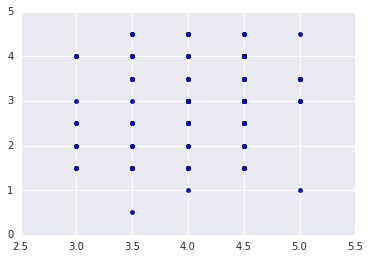

In [14]:
plt.scatter(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
plt.show()

Several movies appear to have low ratings in Metacritic and high ratings in Fandango, or vice versa. We can explore this further by finding the differences between the columns

In [15]:
movies['fm_diff'] = movies['Metacritic_norm_round'] - movies['Fandango_Stars']

Assign the absolute value of fm_diff to fm_diff. This will ensure that we don't only look at cases where Metacritic_norm_round is greater than Fandango_Stars.

In [16]:
movies['fm_diff'] = np.absolute(movies['fm_diff'])

Sort movies based on the fm_diff column, in descending order
Print out the top 5 movies with the biggest differences between Fandango_Stars and Metacritic_norm_round.

In [18]:
movies.sort_values('fm_diff',ascending=False).head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference,fm_diff
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.20,...,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5,4.0
85,Little Boy (2015),20,81,30,5.9,7.4,4.5,4.3,1.00,4.05,...,1.0,4.0,1.5,3.0,3.5,38,5927,811,0.2,3.0
47,Annie (2014),27,61,33,4.8,5.2,4.5,4.2,1.35,3.05,...,1.5,3.0,1.5,2.5,2.5,108,19222,6835,0.3,3.0
19,Pixels (2015),17,54,27,5.3,5.6,4.5,4.1,0.85,2.70,...,1.0,2.5,1.5,2.5,3.0,246,19521,3886,0.4,3.0
134,The Longest Ride (2015),31,73,33,4.8,7.2,4.5,4.5,1.55,3.65,...,1.5,3.5,1.5,2.5,3.5,49,25214,2603,0.0,3.0


### Correlation

Let's see what the correlation coefficient between Fandango_Stars and Metacritic_norm_round is. This will help you determine if Fandango consistently has higher scores than Metacritic, or if only a few movies were assigned higher ratings.

In [23]:
from scipy.stats import pearsonr

r_value, p_value = pearsonr(movies['Fandango_Stars'], movies['Metacritic_norm_round'])
r_value

0.17844919073895918

Correlation is fairly low, totally different scoring between the both givening the Fandango higher scores

### Linear Regression

In [26]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, stderr_slope = linregress(movies['Metacritic_norm_round'], movies['Fandango_Stars'])

In [28]:
pred_3 = 3*slope + intercept
pred_3

4.0917071528212041

### Residual plot

We can create a residual plot to better visualize how the line relates to the existing datapoints. This can help us see if two variables are linearly related or not.

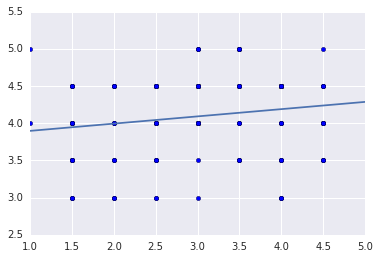

In [29]:
pred_1 = 1*slope + intercept
pred_5 = 5*slope + intercept

plt.scatter(movies["Metacritic_norm_round"], movies["Fandango_Stars"])
plt.plot([1.0, 5.0], [pred_1, pred_5])
plt.xlim(1,5)
plt.show()